Que.Prepare rules for the all the data sets 
1. Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2. Change the minimum length in apriori algorithm
3.  Visulize the obtained rules using different plots  


In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [12]:
# Import The Data
book = pd.read_csv(r'C:\Users\Admin\Downloads\book.csv')

In [13]:
book.shape

(2000, 11)

In [14]:
book.size

22000

In [16]:
# Check Null Values
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


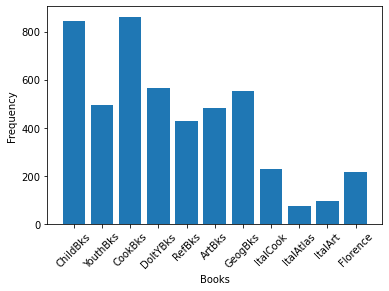

In [24]:
# Check the frequency for the different book categories
plt.bar (book.columns ,book.sum(axis=0))
plt.xticks(rotation = 45)
plt.xlabel("Books")
plt.ylabel("Frequency")
plt.show()

In [28]:
# Perform an apriori algorithm
book_sales1 = apriori(book, min_support=0.1, use_colnames=True)
book_sales1


C:\Users\Admin\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [33]:
# Build an association model use lift metric.
rules1 = association_rules(book_sales1, metric="lift", min_threshold=0.8)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


In [38]:
# categorize the books based on the association rule in ascending order.
rules1.sort_values('lift',ascending = False,inplace=True)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
77,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
80,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
86,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
...,...,...,...,...,...,...,...,...,...
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
12,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
13,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069


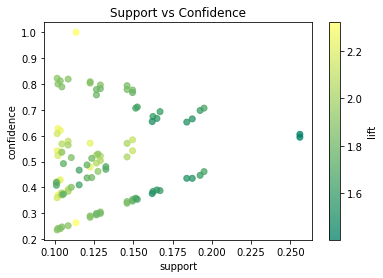

In [53]:
# Plot the Scatter plot for support and confidence for the first association role.
plt.scatter(rules1['support'], rules1['confidence'],c=rules1['lift'],cmap= 'summer',alpha=0.75)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
cbar=plt.colorbar()
cbar.set_label('lift')
plt.show()

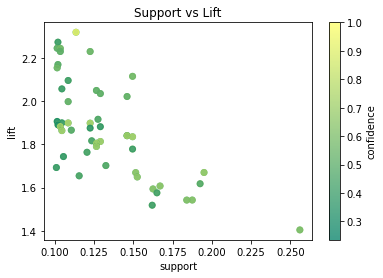

In [59]:
# Plot the Scatter plot for support and lift for the first association role.
plt.scatter(rules1["support"], rules1["lift"],c=rules1['confidence'],cmap= 'summer',alpha=0.75)
plt.xlabel("support")
plt.ylabel("lift")
plt.title("Support vs Lift")
cbar=plt.colorbar()
cbar.set_label('confidence')
plt.show()

In [81]:
# Association Rule for ChildBook
bookname='ChildBks'
rules1_ChildBks =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_ChildBks,["antecedents","consequents"]]

,antecedents,consequents
77,"(ChildBks, ArtBks)",(GeogBks)
52,"(ChildBks, CookBks)",(RefBks)
76,"(ChildBks, GeogBks)",(ArtBks)
65,"(ChildBks, CookBks)",(GeogBks)
71,"(ChildBks, DoItYBks)",(GeogBks)
58,"(ChildBks, CookBks)",(ArtBks)
40,"(ChildBks, CookBks)",(YouthBks)
46,"(ChildBks, CookBks)",(DoItYBks)
70,"(ChildBks, GeogBks)",(DoItYBks)
55,(ChildBks),"(CookBks, RefBks)"


In [91]:
# Association Rule for ChildBook YouthBook.
bookname='YouthBks'
rules1_YouthBks =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_YouthBks,["antecedents","consequents"]]

,antecedents,consequents
45,(YouthBks),"(ChildBks, CookBks)"
42,"(YouthBks, CookBks)",(ChildBks)
41,"(ChildBks, YouthBks)",(CookBks)
18,(YouthBks),(GeogBks)
16,(YouthBks),(ArtBks)
14,(YouthBks),(DoItYBks)
1,(YouthBks),(ChildBks)
12,(YouthBks),(CookBks)


In [100]:
# Association Rule for CookBook.
bookname='CookBks'
rules1_CookBks =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_CookBks,["antecedents","consequents"]]

,antecedents,consequents
28,(CookBks),(ItalCook)
83,"(CookBks, DoItYBks)",(ArtBks)
96,"(CookBks, ArtBks)",(GeogBks)
94,"(GeogBks, CookBks)",(ArtBks)
52,"(ChildBks, CookBks)",(RefBks)
82,"(CookBks, ArtBks)",(DoItYBks)
65,"(ChildBks, CookBks)",(GeogBks)
90,"(CookBks, DoItYBks)",(GeogBks)
58,"(ChildBks, CookBks)",(ArtBks)
40,"(ChildBks, CookBks)",(YouthBks)


In [111]:
# Association Rule for DoItYBook.
bookname='CookBks'
rules1_CookBks =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_CookBks,["antecedents","consequents"]]

,antecedents,consequents
28,(CookBks),(ItalCook)
83,"(CookBks, DoItYBks)",(ArtBks)
96,"(CookBks, ArtBks)",(GeogBks)
94,"(GeogBks, CookBks)",(ArtBks)
52,"(ChildBks, CookBks)",(RefBks)
82,"(CookBks, ArtBks)",(DoItYBks)
65,"(ChildBks, CookBks)",(GeogBks)
90,"(CookBks, DoItYBks)",(GeogBks)
58,"(ChildBks, CookBks)",(ArtBks)
40,"(ChildBks, CookBks)",(YouthBks)


In [124]:
# Association Rule for RefBook.
bookname='RefBks'
rules1_RefBks =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_RefBks,["antecedents","consequents"]]

,antecedents,consequents
57,(RefBks),"(ChildBks, CookBks)"
54,"(CookBks, RefBks)",(ChildBks)
53,"(ChildBks, RefBks)",(CookBks)
37,(RefBks),(GeogBks)
31,(RefBks),(DoItYBks)
7,(RefBks),(ChildBks)
23,(RefBks),(CookBks)


In [138]:
# Association Rule for ArtBook.
bookname='ArtBks'
rules1_ArtBks =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_ArtBks,["antecedents","consequents"]]

,antecedents,consequents
77,"(ChildBks, ArtBks)",(GeogBks)
86,(ArtBks),"(CookBks, DoItYBks)"
96,"(CookBks, ArtBks)",(GeogBks)
99,(ArtBks),"(GeogBks, CookBks)"
81,(ArtBks),"(ChildBks, GeogBks)"
82,"(CookBks, ArtBks)",(DoItYBks)
63,(ArtBks),"(ChildBks, CookBks)"
39,(ArtBks),(GeogBks)
84,"(DoItYBks, ArtBks)",(CookBks)
78,"(GeogBks, ArtBks)",(ChildBks)


In [141]:
# Association Rule for GeogBook.
bookname='GeogBks'
rules1_GeogBks =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_GeogBks,["antecedents","consequents"]]

,antecedents,consequents
80,(GeogBks),"(ChildBks, ArtBks)"
97,(GeogBks),"(CookBks, ArtBks)"
94,"(GeogBks, CookBks)",(ArtBks)
76,"(ChildBks, GeogBks)",(ArtBks)
68,(GeogBks),"(ChildBks, CookBks)"
91,(GeogBks),"(CookBks, DoItYBks)"
74,(GeogBks),"(ChildBks, DoItYBks)"
88,"(GeogBks, CookBks)",(DoItYBks)
38,(GeogBks),(ArtBks)
70,"(ChildBks, GeogBks)",(DoItYBks)


In [143]:
# Association Rule for ItalCook.
bookname='ItalCook'
rules1_ItalCook =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_ItalCook,["antecedents","consequents"]]

,antecedents,consequents
29,(ItalCook),(CookBks)


In [147]:
# Association Rule for ItalAtlas
bookname='ItalAtlas'
rules1_ItalAtlas =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_ItalAtlas,["antecedents","consequents"]]

,antecedents,consequents


In [154]:
# Association Rule for Florence.
bookname='Florence'
rules1_Florence =(rules1.lift>1) & (rules1['antecedents'].astype(str).str.contains(bookname))
rules1.loc[rules1_Florence,["antecedents","consequents"]]

,antecedents,consequents


In [161]:
#crate other rules by taking different length in Apriori.
book_sales2 = apriori(book, min_support=0.15, use_colnames=True)
book_sales2

C:\Users\Admin\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(ChildBks, YouthBks)"
8,0.2560,"(ChildBks, CookBks)"
9,0.1840,"(ChildBks, DoItYBks)"


In [169]:
rules2 = association_rules(book_sales2, metric="lift", min_threshold=0.8)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
8,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
9,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427


In [177]:
rules2.sort_values('lift',ascending = False,inplace=True)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
11,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
17,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556
16,(CookBks),(RefBks),0.4310,0.2145,0.1525,0.353828,1.649549,0.060050,1.215621
20,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
21,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
18,(CookBks),(ArtBks),0.4310,0.2410,0.1670,0.387471,1.607763,0.063129,1.239125
19,(ArtBks),(CookBks),0.2410,0.4310,0.1670,0.692946,1.607763,0.063129,1.853095


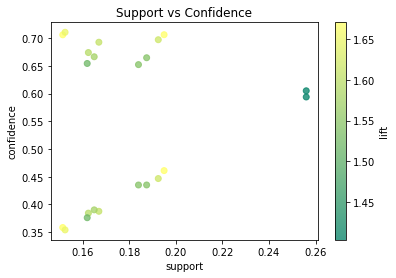

In [190]:
# Plot the Scatter plot for support and confidence for the Second association role.
plt.scatter(rules2['support'], rules2['confidence'],c=rules2['lift'],cmap= 'summer',alpha=0.75)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
cbar=plt.colorbar()
cbar.set_label('lift')
plt.show()

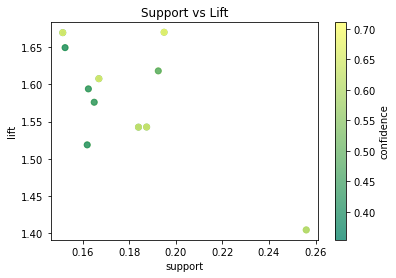

In [195]:
# Plot the Scatter plot for Lift and confidence for the Second association role.
plt.scatter(rules2["support"], rules2["lift"],c=rules2['confidence'],cmap= 'summer',alpha=0.75)
plt.xlabel("support")
plt.ylabel("lift")
plt.title("Support vs Lift")
cbar=plt.colorbar()
cbar.set_label('confidence')
plt.show()

In [206]:
# Crate other rules by taking different length in Apriori
book_sales3 = apriori(book, min_support=0.05, use_colnames=True)
book_sales3

C:\Users\Admin\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(YouthBks, GeogBks, CookBks, DoItYBks)"
96,0.0560,"(YouthBks, GeogBks, CookBks, ArtBks)"
97,0.0650,"(GeogBks, CookBks, ArtBks, DoItYBks)"
98,0.0510,"(ChildBks, CookBks, YouthBks, GeogBks, DoItYBks)"


In [212]:
rules3 = association_rules(book_sales3, metric="lift", min_threshold=0.8)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
657,(ChildBks),"(GeogBks, CookBks, ArtBks, DoItYBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379
658,(CookBks),"(ChildBks, GeogBks, DoItYBks, ArtBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789
659,(GeogBks),"(ChildBks, CookBks, ArtBks, DoItYBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733
660,(DoItYBks),"(ChildBks, GeogBks, CookBks, ArtBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085


In [221]:
# Sorting values on the lift metric.
rules3.sort_values('lift',ascending = False,inplace=True)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
185,(ItalCook),"(YouthBks, CookBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193
180,"(YouthBks, CookBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301
510,"(ChildBks, ItalCook)","(GeogBks, CookBks)",0.0850,0.1925,0.0525,0.617647,3.208556,0.036137,2.111923
511,"(GeogBks, CookBks)","(ChildBks, ItalCook)",0.1925,0.0850,0.0525,0.272727,3.208556,0.036137,1.258125
509,"(ChildBks, CookBks)","(GeogBks, ItalCook)",0.2560,0.0640,0.0525,0.205078,3.204346,0.036116,1.177474
...,...,...,...,...,...,...,...,...,...
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
15,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
14,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240


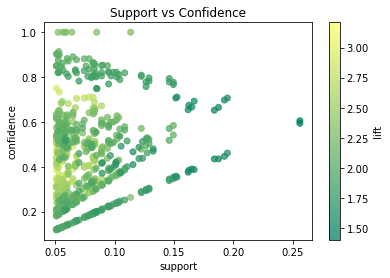

In [229]:
# Plot the Scatter plot Support vs confidence
plt.scatter(rules3['support'], rules3['confidence'],c=rules3['lift'],cmap= 'summer',alpha=0.75)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
cbar=plt.colorbar()
cbar.set_label('lift')
plt.show()

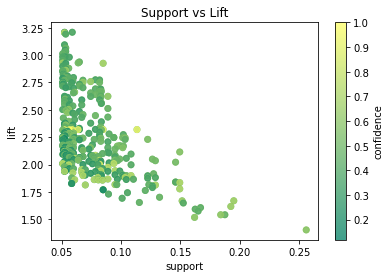

In [248]:
# Plot the  Scatter plot - Support vs lift
plt.scatter(rules3["support"], rules3["lift"],c=rules3['confidence'],cmap= 'summer',alpha=0.75)
plt.xlabel("support")
plt.ylabel("lift")
plt.title("Support vs Lift")
cbar=plt.colorbar()
cbar.set_label('confidence')
plt.show()

Output:-
From all the above association rules that is created, the rule 3 has a higher lift metric, thereby showing more associations to all the books. Thus, we can predict the association rules with last model, rule3.